In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [6]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train[0].reshape(28, 28).shape

(28, 28)

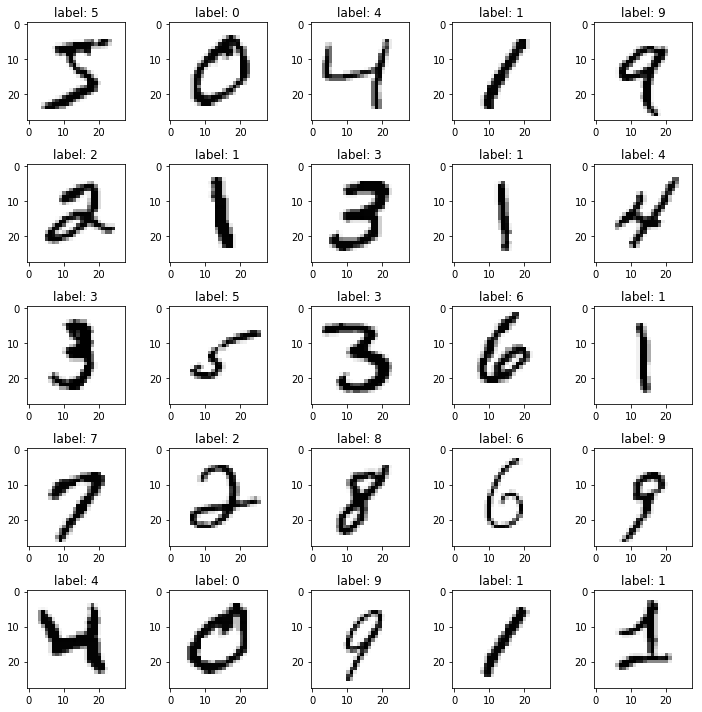

In [9]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap = "Greys")
    ax.set_title("label: " + str(y_train[i]))

plt.tight_layout()

In [10]:
X_train.dtype

dtype('int64')

In [11]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train.astype(np.float32))
X_test_std = scaler.transform(X_test.astype(np.float32))

In [14]:
%%time 
est = linear_model.SGDClassifier(learning_rate='invscaling', eta0 = 1.0)
est.fit(X_train_std, y_train)
print("Accuracy", est.score(X_test_std, y_test)) # accuracy score

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy 0.9148
CPU times: user 4.06 s, sys: 266 ms, total: 4.32 s
Wall time: 4.31 s


In [21]:
y_test_pred = est.predict(X_test_std)

In [22]:
missed = np.not_equal(y_test, y_test_pred)

In [23]:
pd.Series(missed).value_counts() / len(y_test)

False    0.9148
True     0.0852
Name: 0, dtype: float64

In [31]:
X_test[missed][0].shape

(784,)

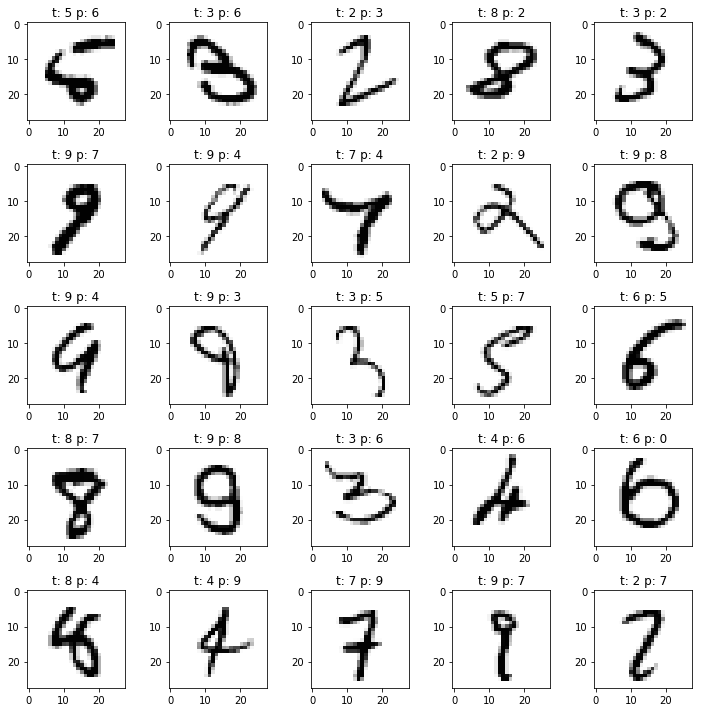

In [43]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[missed][i].reshape(28, 28), cmap = "Greys")
    true_label = list(y_test[missed])[i]
    pred_label = list(y_test_pred[missed])[i]
    
    ax.set_title("t: " + str(true_label) +  " p: " + str(pred_label))

plt.tight_layout()

In [45]:
est.coef_.shape

(10, 784)

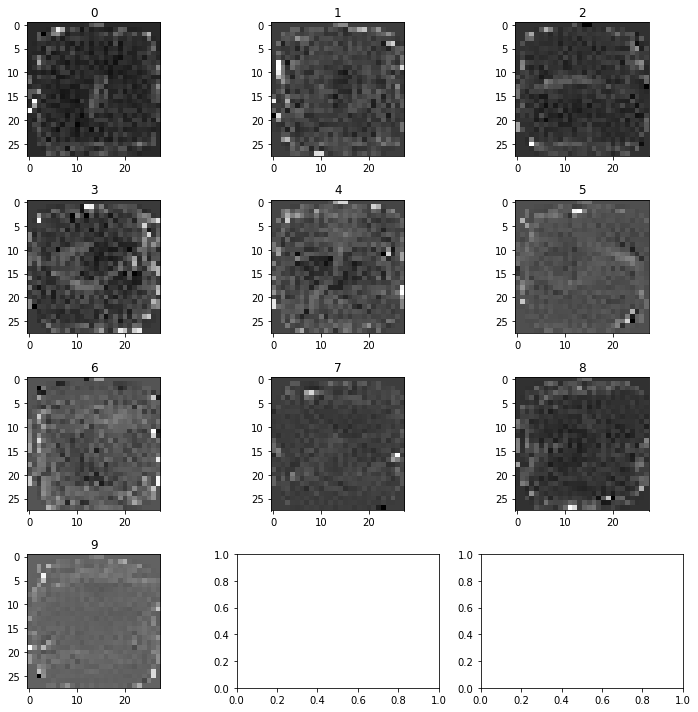

In [48]:
fig, _ = plt.subplots(4, 3, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    if i < 10:
        img = est.coef_[i].reshape(28, 28)
        ax.imshow(img, cmap = "Greys")
        ax.set_title(str(i))

plt.tight_layout()